In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("buffett_holdings.json", "r") as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)
df.head()

,Stock,Shares,Reported Price,Value,Recent Price,Change %
0,AAPL - Apple Inc.,"300,000,000",$250.42,"$75,126,000,000",$197.22,-21.24%
1,AXP - American Express,"151,610,700",$296.79,"$44,996,540,000",$251.31,-15.32%
2,BAC - Bank of America Corp.,"680,233,587",$43.95,"$29,896,267,000",$37.40,-14.90%
3,KO - Coca Cola Co.,"400,000,000",$62.26,"$24,904,000,000",$73.07,17.36%
4,CVX - Chevron Corp.,"118,610,534",$144.84,"$17,179,549,000",$138.00,-4.72%


In [4]:
df['Value'] = df['Value'].replace('[\$,]', '', regex=True).astype(float)
df['Reported Price'] = df['Reported Price'].replace('[\$,]', '', regex=True).astype(float)
df['Recent Price'] = df['Recent Price'].replace('[\$,]', '', regex=True).astype(float)

df['Change Numeric'] = df['Change %'].str.replace('%','').astype(float)

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Madhu\AppData\Local\Temp\ipykernel_2332\2944739870.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Value'] = df['Value'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Madhu\AppData\Local\Temp\ipykernel_2332\2944739870.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Reported Price'] = df['Reported Price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Madhu\AppData\Local\Temp\ipykernel_2332\2944739870.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Recent Price'] = df['Recent Price'].replace('[\$,]', '', regex=True).astype(float)


,Stock,Shares,Reported Price,Value,Recent Price,Change %,Change Numeric
0,AAPL - Apple Inc.,"300,000,000",250.42,7.512600e+10,197.22,-21.24%,-21.24
1,AXP - American Express,"151,610,700",296.79,4.499654e+10,251.31,-15.32%,-15.32
2,BAC - Bank of America Corp.,"680,233,587",43.95,2.989627e+10,37.40,-14.90%,-14.90
3,KO - Coca Cola Co.,"400,000,000",62.26,2.490400e+10,73.07,17.36%,17.36
4,CVX - Chevron Corp.,"118,610,534",144.84,1.717955e+10,138.00,-4.72%,-4.72


# Insights 1: Top Holdings by Value

In [5]:
df_sorted = df.copy()
df_sorted.sort_values(by="Value", ascending=False, inplace=True)
df_sorted[['Stock', 'Value']].head(5)

,Stock,Value
0,AAPL - Apple Inc.,7.512600e+10
1,AXP - American Express,4.499654e+10
2,BAC - Bank of America Corp.,2.989627e+10
3,KO - Coca Cola Co.,2.490400e+10
4,CVX - Chevron Corp.,1.717955e+10


# Insights 2: Biggest Gainers and Losers (by % Change)


In [6]:
df_sorted.sort_values('Change Numeric', ascending=False).head(5)

df_sorted.sort_values('Change Numeric').head(5)

,Stock,Shares,Reported Price,Value,Recent Price,Change %,Change Numeric
33,JEF - Jefferies Financial Group Inc.,"433,558",78.40,3.399100e+07,42.82,-45.38%,-45.38
34,LEN.B - Lennar Corp. CL B,"152,572",132.15,2.016200e+07,99.49,-24.71%,-24.71
0,AAPL - Apple Inc.,"300,000,000",250.42,7.512600e+10,197.22,-21.24%,-21.24
14,AMZN - Amazon.com Inc.,"10,000,000",219.39,2.193900e+09,173.09,-21.10%,-21.10
5,OXY - Occidental Petroleum,"264,178,414",49.41,1.305306e+10,39.82,-19.41%,-19.41


# Insights 3: Portfolio Concentration (Herfindahl Index)

In [7]:
df['weight'] = df['Value'] / df['Value'].sum()
hhi = (df['weight']**2).sum()
print(f"Herfindahl Index: {hhi:.4f}")


Herfindahl Index: 0.1404


# Insights 4: Compare Reported Price vs Recent Price

In [9]:
df['Profit/Loss'] = df['Recent Price'] - df['Reported Price']

profitable = df[df['Profit/Loss'] > 0]
losing = df[df['Profit/Loss'] < 0]

print(f"Profitable Stocks: {profitable[['Stock', 'Profit/Loss']]}")
print(f"Losing Stocks: {losing[['Stock', 'Profit/Loss']]}")

Profitable Stocks:                                             Stock  Profit/Loss
3                              KO - Coca Cola Co.        10.81
8                              CB - Chubb Limited         9.17
10                                KR - Kroger Co.        10.07
11                           VRSN - Verisign Inc.        39.71
13                                  V - Visa Inc.        14.46
16                                  AON - Aon Plc         9.24
21                       DPZ - Dominos Pizza Inc.        47.05
22                        TMUS - T-Mobile US Inc.        39.42
23      LLYVK - Liberty Media Corp. Series C Live         0.42
27                           NU - Nu Holdings Ltd         0.68
28      LLYVA - Liberty Media Corp. Series A Live         0.94
30                       HEI.A - HEICO Corp. CL A        10.28
36  BATRK - Atlanta Braves Holdings Inc. Series C         0.44
Losing Stocks:                                               Stock  Profit/Loss
0                  

# Insights 5: Risk Exposure (Impact of Change on Portfolio Value)

In [11]:
df['Risk Impact'] = df['Value'] * df['Change Numeric'] / 100
df_sorted_risk = df.sort_values('Risk Impact', ascending=False)
df_sorted_risk[['Stock', 'Risk Impact']].head(5)


,Stock,Risk Impact
3,KO - Coca Cola Co.,4.323334e+09
11,VRSN - Verisign Inc.,5.270842e+08
10,KR - Kroger Co.,5.035702e+08
8,CB - Chubb Limited,2.479852e+08
22,TMUS - T-Mobile US Inc.,1.714874e+08


# Insights 6: Sector Allocation (Manual Mapping)


In [12]:
sector_map = {
    'AAPL': 'Tech',
    'AXP': 'Finance',
    'BAC': 'Finance',
    'KO': 'Consumer Goods',
    'CVX': 'Energy',

}

df['Sector'] = df['Stock'].map(sector_map)

sector_group = df.groupby('Sector')['Value'].sum().sort_values(ascending=False)
sector_group

Series([], Name: Value, dtype: float64)

# Insights 7: Visualize Portfolio Distribution (Top Holdings)



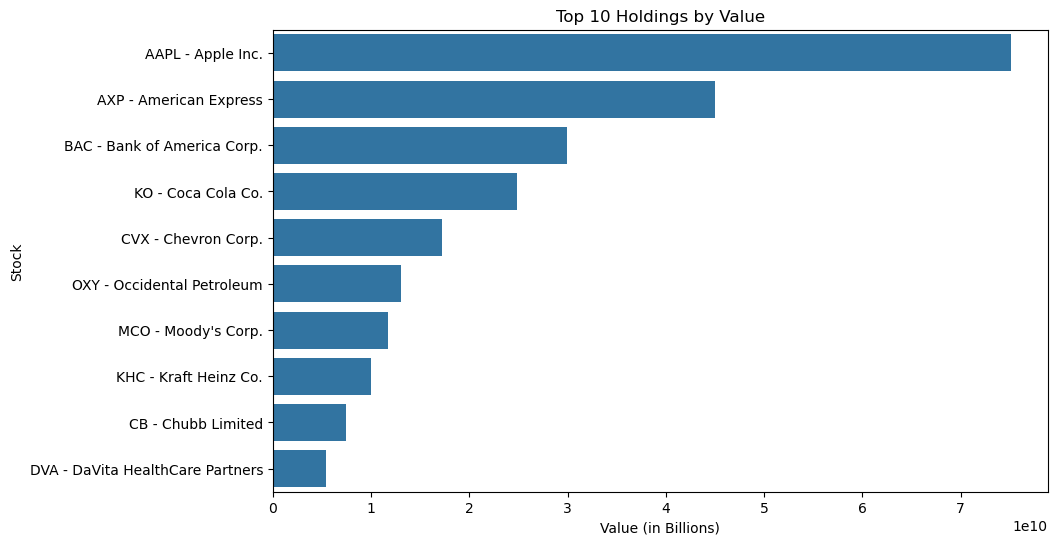

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Stock', data=df_sorted.head(10))
plt.title("Top 10 Holdings by Value")
plt.xlabel('Value (in Billions)')
plt.ylabel('Stock')
plt.show()

# Insights 8: Save Data to CSV (Optional)


In [17]:
df.to_csv("buffett_holdings.csv", index=False)

print("Data saved to buffett_holdings.csv")

Data saved to buffett_holdings.csv


1. Correlation between Stock Price and Portfolio Value

                Recent Price  Reported Price     Value
Recent Price        1.000000        0.999714 -0.073268
Reported Price      0.999714        1.000000 -0.067160
Value              -0.073268       -0.067160  1.000000


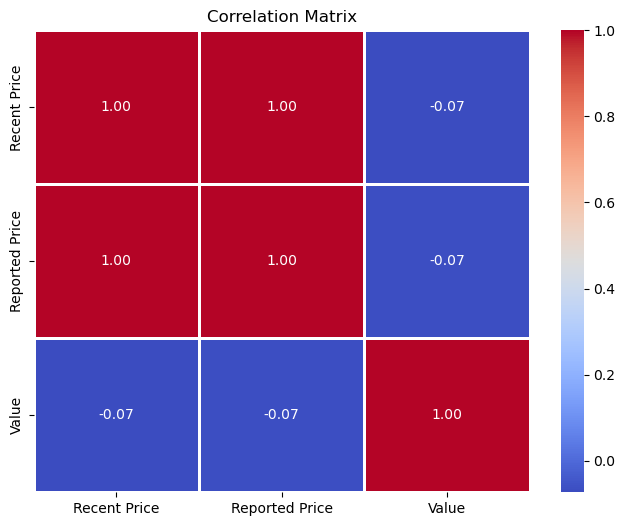

In [18]:
correlation_matrix = df[['Recent Price', 'Reported Price', 'Value']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Correlation Matrix")
plt.show()